Units used: GeV for masses, s for time, cm for distances

In [91]:
import os
import glob
import importlib

import matplotlib as mlib
import matplotlib.pyplot as plt

# plt.rcParams["text.usetex"] = True
# plt.rcParams["text.latex.preamble"] = r"\usepackage{slashed}"

import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
import TdAlps
from collections import OrderedDict

import scipy
import scipy.integrate as integrate
import scipy.optimize as optimize

import csv

In [92]:
#Plotting settings

font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

### mass-coupling grid

In [93]:
#masslist= [0.05, 0.05, 0.1, 0.2, 0.3, 0.5, 1., 2., 4.]
masslist=np.sort(np.append(np.logspace(-2, 0, 25),[0.09, 0.101, 0.43, 0.47,0.55,\
                                                   0.95, 1, 1.5, 2, 2.5, 3, 3.2, 3.5, 4,\
                                                   0.0935, 0.095, 0.63, 0.65]))
masslistShort=np.logspace(-2,np.log(2.1), 40)
particleCodes=[*range(0,7,1)]

In [94]:
masslistShort

array([0.01      , 0.01175726, 0.01382331, 0.01625243, 0.0191084 ,
       0.02246624, 0.02641414, 0.03105579, 0.0365131 , 0.0429294 ,
       0.0504732 , 0.05934265, 0.06977069, 0.08203121, 0.09644622,
       0.11339432, 0.13332063, 0.15674852, 0.1842933 , 0.2166784 ,
       0.25475441, 0.29952136, 0.35215502, 0.41403778, 0.48679494,
       0.57233742, 0.67291193, 0.79115999, 0.93018729, 1.09364529,
       1.28582709, 1.51178022, 1.77743916, 2.08978126, 2.45700995,
       2.88877024, 3.396402  , 3.9932378 , 4.69495311, 5.51997797])

In [95]:
couplingList=np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))
couplingListShort=np.logspace(np.log(8*10**-4), np.log(1.7), 25)

In [96]:
couplingListShort

array([7.39777588e-08, 1.54287757e-07, 3.21782010e-07, 6.71107442e-07,
       1.39965935e-06, 2.91912468e-06, 6.08811630e-06, 1.26973542e-05,
       2.64815579e-05, 5.52298451e-05, 1.15187173e-04, 2.40233968e-04,
       5.01031130e-04, 1.04494879e-03, 2.17934156e-03, 4.54522719e-03,
       9.47951003e-03, 1.97704332e-02, 4.12331468e-02, 8.59957079e-02,
       1.79352350e-01, 3.74056638e-01, 7.80131225e-01, 1.62703897e+00,
       3.39334683e+00])

### importing bounds

In [97]:
# readArrayVisibleBoundBelleIIcffEqcWWEqcBB = np.load('output/visibleBoundBelleIIcffEqcWWEqcBB.npy')
readArrayVisibleBoundBelleIIcff = np.load('output/visibleBoundBelleIIcff.npy')
readArrayVisibleBoundBelleIIcWW = np.load('output/visibleBoundBelleIIcWW.npy')

In [98]:
BaBarBounds=genfromtxt('../ruth/bb.txt', delimiter='\t')

In [99]:
BellIIInvBounds05ab0bkg=genfromtxt('../ruth/b2_05_0bg.txt', delimiter='\t')
BellIIInvBounds50ab0bkg=genfromtxt('../ruth/b2_50_0bg.txt', delimiter='\t')

BellIIInvBounds05abWithbkg=genfromtxt('../ruth/b2_05_bg.txt', delimiter='\t')
BellIIInvBounds50abWithbkg=genfromtxt('../ruth/b2_50_bg.txt', delimiter='\t')

In [100]:
LHCbBoundscff=genfromtxt('output/LHCb_cff.dat', delimiter='\t')
LHCbBoundscWW=genfromtxt('output/LHCb_cWW.dat', delimiter='\t')

In [101]:
Na62Boundscff = genfromtxt('output/Na62_cff.dat', delimiter='\t')
Na62BoundscWW = genfromtxt('output/Na62_cWW.dat', delimiter='\t')

### plots

In [102]:
def plotBounds(boundsArray, particleCode, upper=False):
    if upper:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,1]]).T
    else:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,0]]).T

In [103]:
def stackBounds(xarray,arrSmattToLarge,arrLargeToSmall):
    combinedx=np.append(xarray,np.flip(xarray))
    combinedy=np.append(arrSmattToLarge,np.flip(arrLargeToSmall))
    
    return np.vstack([combinedx,combinedy]).T

In [104]:
def plotGen(inputarray,lineScatterFillORPolygon,color,linewidthORmarkersize,maCut=None,*args,**kwargs):
    
    if (maCut is not None):
        cut=inputarray[:,0]<maCut
        cutdata=inputarray[cut]
    else: 
        cutdata=inputarray
        
    
    data=cutdata[~np.isnan(cutdata[:,1])]
#     print(data[:,0])
    
    if not args:
        alphaPoly=0.3
    else:
        alphaPoly=args[0]
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,0],data[:,1], color=color, alpha=1,**kwargs)
    if (lineScatterFillORPolygon=="oppacpolygon"):
        ax.fill(data[:,0],data[:,1], facecolor=color,alpha=alphaPoly,\
                edgecolor=color,linewidth=linewidthORmarkersize,**kwargs)
    if (lineScatterFillORPolygon=="nonfilledpolygon"):
        ax.fill(data[:,0],data[:,1], facecolor="none", edgecolor=color,\
                linewidth=linewidthORmarkersize, linestyle='-',**kwargs)
        
def plotAllowed(inputfile,x,y,z,zfixed):
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    
    #choosing only rows with z=zfixed
    zfixedonly=inputparams[:,z]==zfixed
    params=inputparams[zfixedonly]

    allowed=params[:,5]==1

    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    
def plotAllAllowed(inputfile,x,y):
    params = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    
    allowed=params[:,5]==1
    
    
    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    
    

In [105]:
# function that plots cut-out regions from 1612.07818 and Na62

def whiteregionsLHCb(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)
#     return np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def whiteregionsNa62(m):
    return 1-np.heaviside(m - 0.110,0)*np.heaviside(-m + 0.154,0)

def plotWhiteRegions(whiteregionsFunc,xmin,xmax,yupper,order):
    m=np.linspace(xmin,xmax,num=10000);
    plt.fill_between(m,(1-whiteregionsFunc(m))*yupper,0,color="white",zorder=order)

In [106]:
colorBelleIIinvNobkg="darkred"
colorBelleIIinvWithbkg="indianred"
colorNa62="teal"

# Combined plots

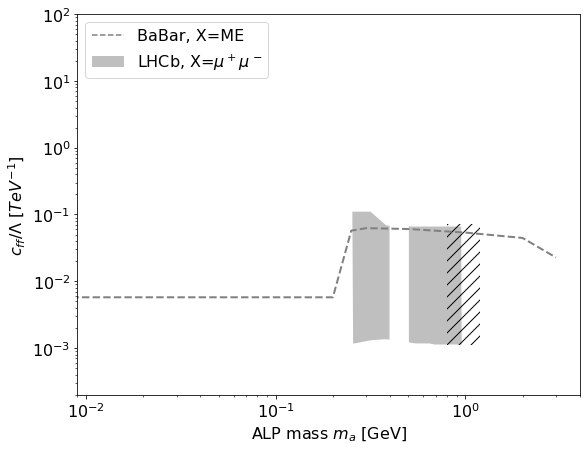

In [115]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)

plotGen(LHCbBoundscff,"oppacpolygon","grey",0,1,0.5, label='LHCb, X=$\mu^+ \mu^-$')

plotWhiteRegions(whiteregionsLHCb,0.3,5,10**(2),2)



p = mpatches.Rectangle((0.8,1.1*10**-3), 0.4, 0.07, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)

# ax.set_title('Bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/\Lambda\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(2*10**-4, 10**2)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
handles.insert(0, babar) 

ax.legend(handles=handles,loc='upper left')



plt.savefig('plots/Bound-LHCb-BaBar-cff.png', dpi=300, bbox_inches='tight')

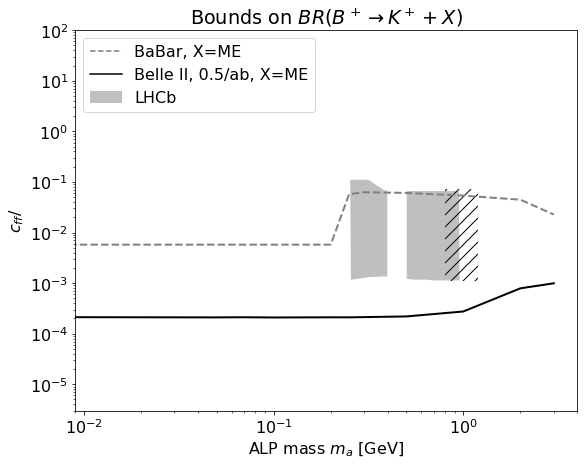

In [117]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)

# ax.plot(Na62Boundscff[:,0],Na62Boundscff[:,1],c="blue", ls='-',lw=2,zorder=1)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c="black", ls='-',lw=2)

plotGen(LHCbBoundscff,"oppacpolygon","grey",0,1,0.5, label='LHCb')

plotWhiteRegions(whiteregionsLHCb,0.3,5,10**(5),2)




p = mpatches.Rectangle((0.8,1.1*10**-3), 0.4, 0.07, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)

ax.set_title('Bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/\f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(3*10**-6, 10**2)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color='black', linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, X='+"ME")
handles.insert(0, belleIIInv) 
handles.insert(0, babar) 

ax.legend(handles=handles,loc='upper left')



plt.savefig('plots/Bound-LHCb-BaBar-BelleIIInv-cff.png', dpi=300, bbox_inches='tight')

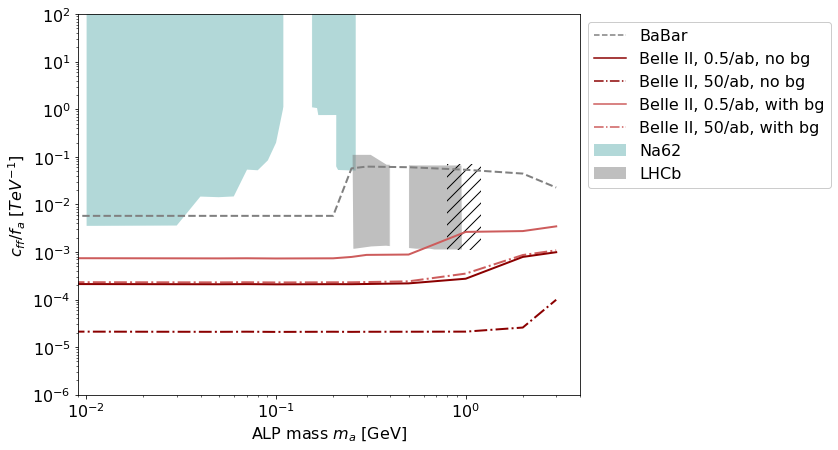

In [119]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)


plotGen(Na62Boundscff,"oppacpolygon",colorNa62,0,0.5, label='Na62')
plotWhiteRegions(whiteregionsNa62,0.05,0.3,10**(2),2)

ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-.',lw=2)

plotGen(LHCbBoundscff,"oppacpolygon","grey",0,1,0.5, label='LHCb')

plotWhiteRegions(whiteregionsLHCb,0.3,5,10**(5),2)


p = mpatches.Rectangle((0.8,1.1*10**-3), 0.4, 0.07, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)

# ax.set_title('Bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(10**-6, 10**2)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar')
belleIIInvNobg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50Nobg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')

handles.insert(0, belleIIInv50Nobg)
handles.insert(0, belleIIInvNobg)
handles.insert(0, belleIIInv50bg)
handles.insert(0, belleIIInvbg) 
handles.insert(0, babar) 

ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 1), framealpha=1)



plt.savefig('plots/Bound-LHCb-BaBar-Na62-BelleIIInv-cff.png', dpi=300, bbox_inches='tight')

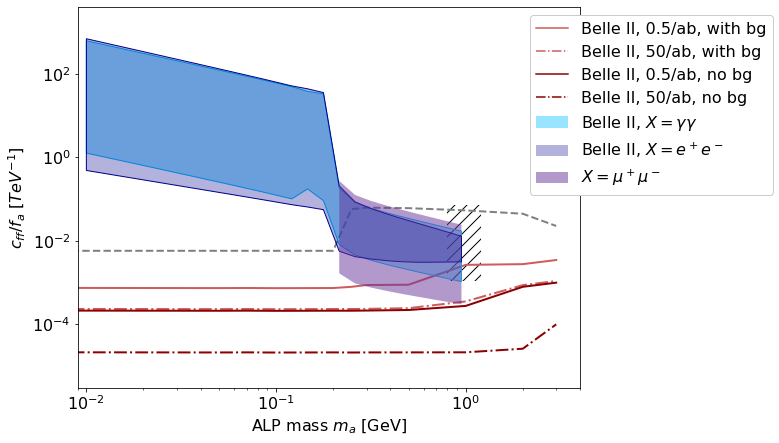

In [120]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)



ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-.',lw=2)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
                    label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"nonfilledpolygon","deepskyblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
                    label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"nonfilledpolygon","darkblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
                    readArrayVisibleBoundBelleIIcff[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
                    label='$X=\mu^+ \mu^-$',zorder=3)
# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
#                     readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon","rebeccapurple",1)


p = mpatches.Rectangle((0.8,1.1*10**-3), 0.4, 0.07, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)


# ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(3*10**-6, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

handles.insert(0, belleIIInv50)
handles.insert(0, belleIIInv)
handles.insert(0, belleIIInv50bg)
handles.insert(0, belleIIInvbg)  

ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1), framealpha=1)



# plt.savefig('plots/Bounds-projections-cff-50ab.png', dpi=300, bbox_inches='tight')

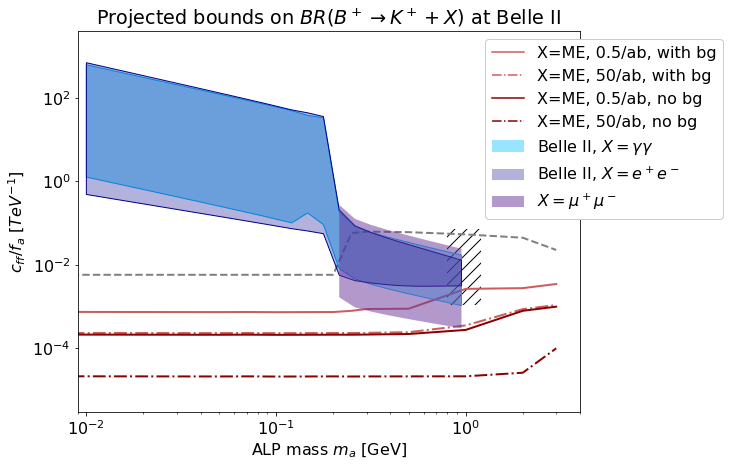

In [121]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)


ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-.',lw=2)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
                    label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"nonfilledpolygon","deepskyblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
                    label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"nonfilledpolygon","darkblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
                    readArrayVisibleBoundBelleIIcff[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
                    label='$X=\mu^+ \mu^-$',zorder=3)
# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
#                     readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon","rebeccapurple",1)

p = mpatches.Rectangle((0.8,1.1*10**-3), 0.4, 0.07, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)


ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$ at Belle II')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(3*10**-6, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='X=ME, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='X=ME, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='X=ME, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='X=ME, 50/ab, with bg')

handles.insert(0, belleIIInv50)
handles.insert(0, belleIIInv)
handles.insert(0, belleIIInv50bg)
handles.insert(0, belleIIInvbg)  

ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1), framealpha=1)



# plt.savefig('plots/visible-inv-BelleII.png', dpi=300, bbox_inches='tight')

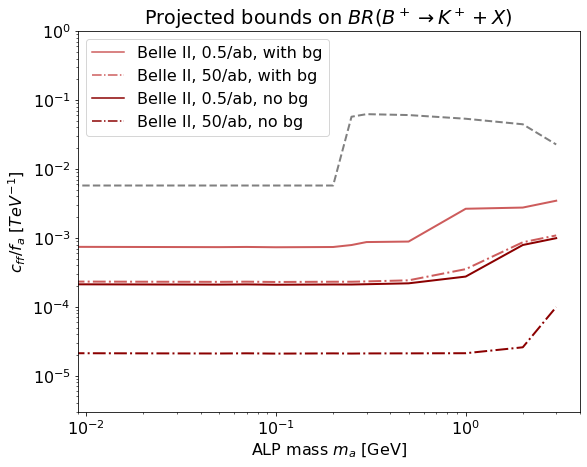

In [122]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)


ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-.',lw=2)



ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(3*10**-6, 1)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

handles.insert(0, belleIIInv50)
handles.insert(0, belleIIInv)
handles.insert(0, belleIIInv50bg)
handles.insert(0, belleIIInvbg)  

ax.legend(handles=handles, loc='upper left')



plt.savefig('plots/invisible_bounds-projections.png', dpi=300, bbox_inches='tight')

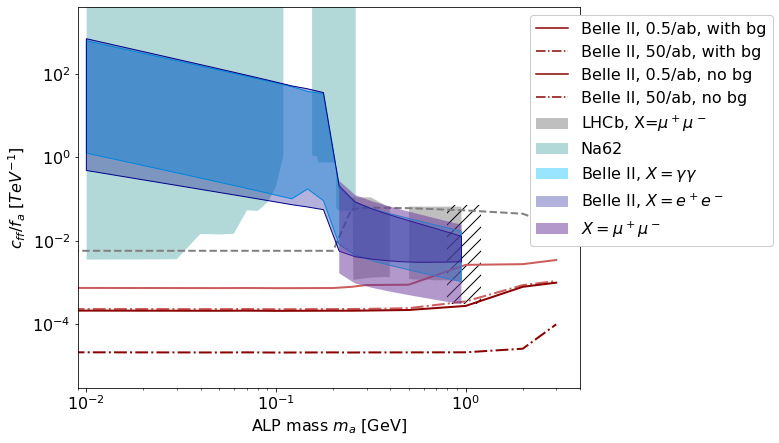

In [141]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="grey", ls='--',lw=2)

plotGen(LHCbBoundscff,"oppacpolygon","grey",0,1,0.5, label='LHCb, X=$\mu^+ \mu^-$')
# plotGen(LHCbBounds,"nonfilledpolygon","grey",1)
plotWhiteRegions(whiteregionsLHCb,0.3,5,10**(2),2)

plotGen(Na62Boundscff,"oppacpolygon",colorNa62,0,0.5, label='Na62')
plotWhiteRegions(whiteregionsNa62,0.05,0.3,10**(5),2)


ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-.',lw=2)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
                    label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"nonfilledpolygon","deepskyblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
                    label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"nonfilledpolygon","darkblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
                    readArrayVisibleBoundBelleIIcff[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
                    label='$X=\mu^+ \mu^-$',zorder=3)
# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
#                     readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon","rebeccapurple",1)

p = mpatches.Rectangle((0.8,3*10**-4), 0.4, 0.07, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)


# ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(3*10**-6, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

handles.insert(0, belleIIInv50)
handles.insert(0, belleIIInv)
handles.insert(0, belleIIInv50bg)
handles.insert(0, belleIIInvbg)  

ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1), framealpha=1)


plt.savefig('plots/Bounds-projections-cff-50ab_with-Na62.png', dpi=300, bbox_inches='tight')

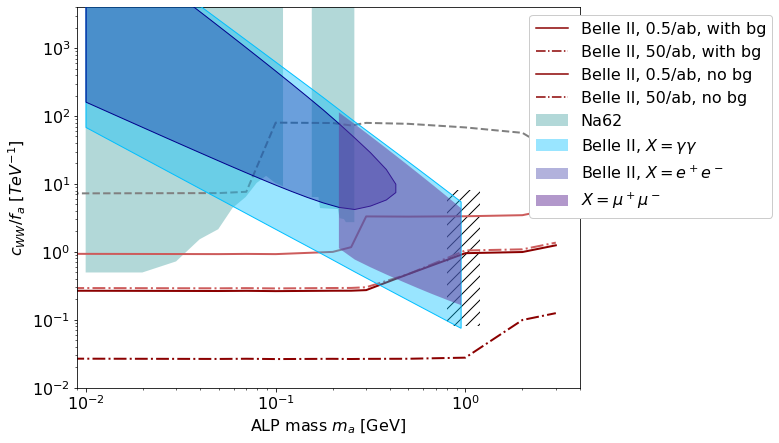

In [143]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="grey", ls='--',lw=2)

# plotGen(LHCbBoundscff,"oppacpolygon","grey",0,1,0.5, label='LHCb, X=$\mu^+ \mu^-$')
# plotGen(LHCbBounds,"nonfilledpolygon","grey",1)
plotWhiteRegions(whiteregionsLHCb,0.3,5,10**(2),2)

plotGen(Na62BoundscWW,"oppacpolygon",colorNa62,0,0.5, label='Na62')
plotWhiteRegions(whiteregionsNa62,0.05,0.3,10**(5),2)


ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,2],c=colorBelleIIinvWithbkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,2],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,2],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,2],c=colorBelleIIinvNobkg, ls='-.',lw=2)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
                    label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"nonfilledpolygon","deepskyblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
                    label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"nonfilledpolygon","darkblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],\
                    readArrayVisibleBoundBelleIIcWW[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
                    label='$X=\mu^+ \mu^-$',zorder=3)
# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
#                     readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon","rebeccapurple",1)

p = mpatches.Rectangle((0.8,8*10**-2), 0.4, 8, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)

# ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{WW}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(10**-2, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

handles.insert(0, belleIIInv50)
handles.insert(0, belleIIInv)
handles.insert(0, belleIIInv50bg)
handles.insert(0, belleIIInvbg)  

ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1), framealpha=1)


plt.savefig('plots/Bounds-projections-cWW-50ab_with-Na62.png', dpi=300, bbox_inches='tight')

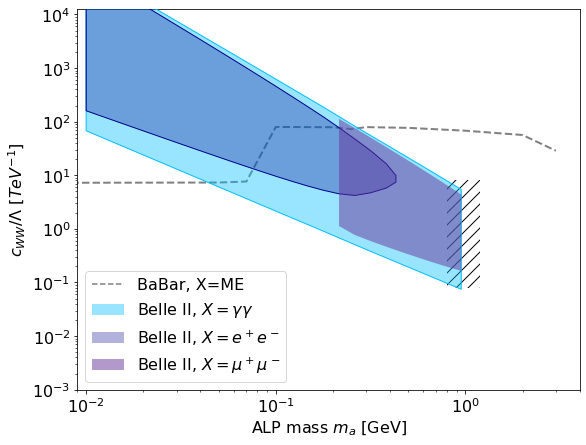

In [138]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="grey", ls='--',lw=2)


plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
                    label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"nonfilledpolygon","deepskyblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
                    label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"nonfilledpolygon","darkblue",1,1,zorder=3)

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],\
                    readArrayVisibleBoundBelleIIcWW[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
                    label='Belle II, $X=\mu^+ \mu^-$',zorder=3)
# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
#                     readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon","rebeccapurple",1)

p = mpatches.Rectangle((0.8,8*10**-2), 0.4, 8, linewidth=0, fill=None, hatch='//')
ax.add_patch(p)


# ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{WW}/\Lambda\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(10**-3, 4*np.pi*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
handles.insert(0, babar) 

ax.legend(handles=handles)



plt.savefig('plots/BoundBelleII-cWW-projections.png', dpi=300, bbox_inches='tight')

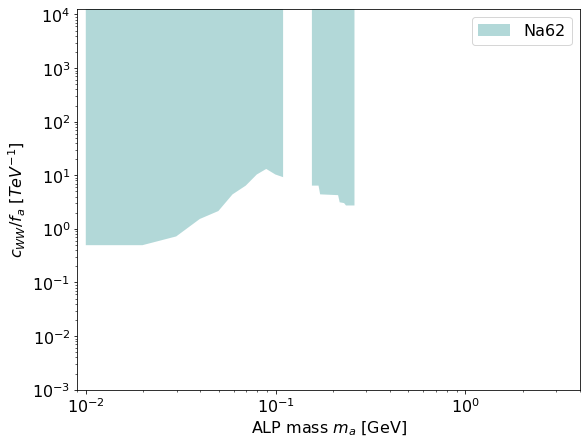

In [139]:
fig, ax = plt.subplots(figsize=(9, 7))



plotGen(Na62BoundscWW,"oppacpolygon","teal",0,0.5, label='Na62')
plotWhiteRegions(whiteregionsNa62,0.05,0.3,10**(5),2)

# p = mpatches.Rectangle((0.8,10**-1), 0.4, 2, linewidth=0, fill=None, hatch='//')
# ax.add_patch(p)

# ax.set_title('Bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{WW}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 4)
ax.set_ylim(10**-3, 4*np.pi*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
# handles.insert(0, babar) 

ax.legend(handles=handles)



plt.savefig('plots/BoundBelleII-cWW.png', dpi=300, bbox_inches='tight')